In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and preprocess data
df = pd.read_excel('D:\\OLAP\\Coffee Data.xlsx')
df = df[['Order Date', 'Amount']]
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values(by='Order Date')
df = df.groupby('Order Date')['Amount'].sum().reset_index()
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

# Features and target variable
X = df[['Year', 'Month', 'Day']]
y = df['Amount']

In [15]:
# Correct Time Series Splitting
train_size = int(len(df) * 0.7)  # 70% for training
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

train_dates = df['Order Date'].iloc[0:train_size]
test_dates = df['Order Date'].iloc[train_size:len(X)]

In [17]:
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_test = rf_model.predict(X_test)

In [23]:
# Future prediction setup (365 days into the future)
future_dates = pd.date_range(start=df['Order Date'].max() + pd.Timedelta(days=1), periods=365, freq='D')
future_df = pd.DataFrame({'Order Date': future_dates})
future_df['Year'] = future_df['Order Date'].dt.year
future_df['Month'] = future_df['Order Date'].dt.month
future_df['Day'] = future_df['Order Date'].dt.day
X_future = future_df[['Year', 'Month', 'Day']]
future_predictions = rf_model.predict(X_future)
future_df['Amount'] = future_predictions

0      59.86660
1      50.61460
2      61.17960
3      96.36915
4      51.82785
         ...   
360    53.49900
361    40.42675
362    41.87380
363    50.21320
364    53.06340
Name: Amount, Length: 365, dtype: float64

In [5]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 4682.959659443996
Root Mean Squared Error (RMSE): 68.43215369578833
Mean Absolute Error (MAE): 51.902270772946856
Mean Absolute Percentage Error (MAPE): 161.905368978793


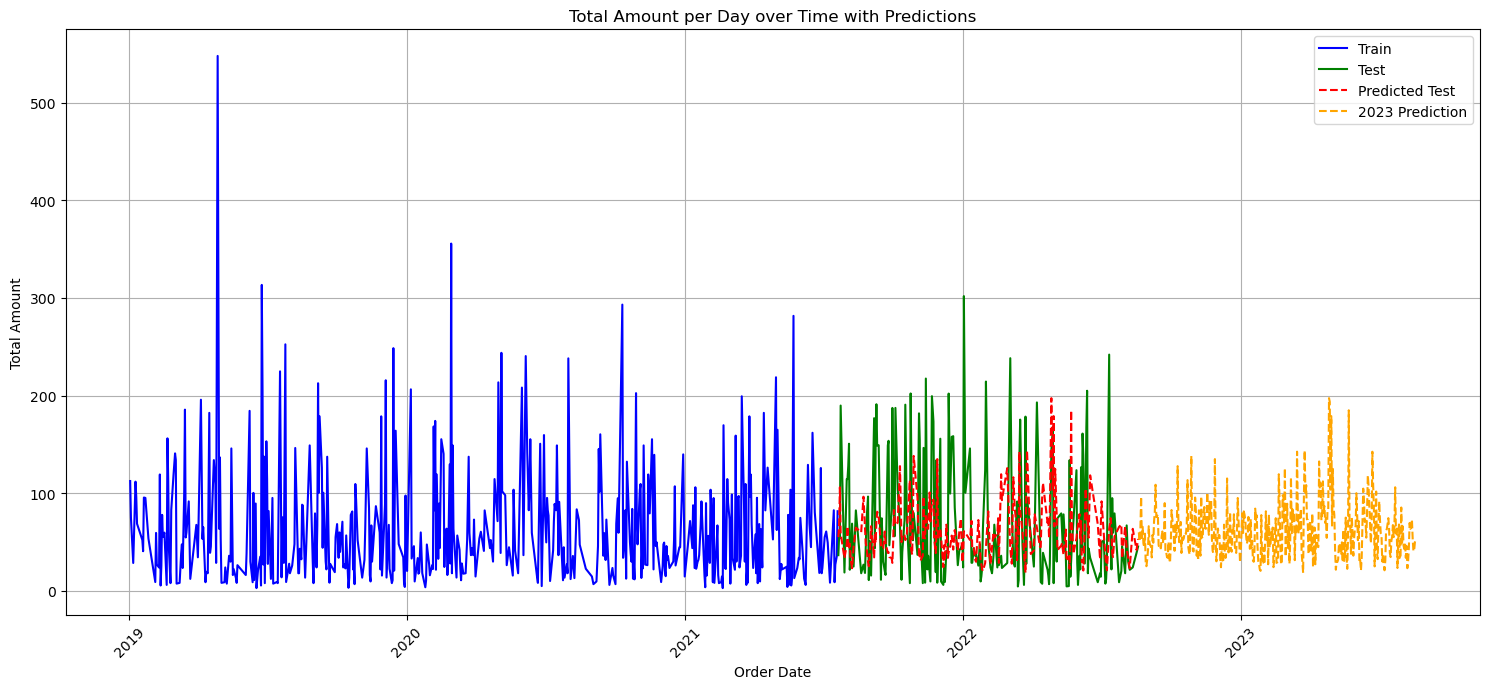

In [6]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot_date(train_dates, y_train, fmt='-', label='Train', color='blue', marker=None)
plt.plot_date(test_dates, y_test, fmt='-', label='Test', color='green', marker=None)
plt.plot_date(test_dates, y_pred_test, fmt='--', label='Predicted Test', color='red', marker=None)
plt.plot_date(future_df['Order Date'], future_df['Amount'], fmt='--', label='2023 Prediction', color='orange', marker=None)
plt.xlabel('Order Date')
plt.ylabel('Total Amount')
plt.title('Total Amount per Day over Time with Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()